In [1]:
# Library Imports.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

# Allows plots to appear directly in the notebook.
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

In [2]:
# Read CSV file into Data Frame:
trips = pd.read_csv('cleaned_trips.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

In [3]:
trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE,NOTE,planDep_time,month,day,dayOfWeek,arrival_diff,departure_diff,planned_duration,actual_duration,duration_diff
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524,84600,28-FEB-18 12:05:11,",2967409,",0,2,7,2,279,0,2645,2924,279
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752,26460,28-FEB-18 12:05:11,",2580260,",7,2,7,2,2235,0,4057,6292,2235
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329,32082,28-FEB-18 12:05:11,",2448968,",9,2,7,2,817,-18,3412,4247,835
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463,54443,28-FEB-18 12:05:11,",3094242,",15,2,7,2,1202,23,2841,4020,1179
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682,81608,28-FEB-18 12:05:11,",2526331,",23,2,7,2,-701,8,3783,3074,-709


In [4]:
trips.dtypes

DAYOFSERVICE        object
TRIPID               int64
LINEID              object
ROUTEID             object
DIRECTION            int64
PLANNEDTIME_ARR      int64
PLANNEDTIME_DEP      int64
ACTUALTIME_ARR       int64
ACTUALTIME_DEP       int64
LASTUPDATE          object
NOTE                object
planDep_time         int64
month                int64
day                  int64
dayOfWeek            int64
arrival_diff         int64
departure_diff       int64
planned_duration     int64
actual_duration      int64
duration_diff        int64
dtype: object

In [5]:
trips['DIRECTION'] = trips['DIRECTION'].astype('int32')
trips['planDep_time'] = trips['planDep_time'].astype('int32')
trips['month'] = trips['month'].astype('int32')
trips['day'] = trips['day'].astype('int32')

In [6]:
trips.dtypes

DAYOFSERVICE        object
TRIPID               int64
LINEID              object
ROUTEID             object
DIRECTION            int32
PLANNEDTIME_ARR      int64
PLANNEDTIME_DEP      int64
ACTUALTIME_ARR       int64
ACTUALTIME_DEP       int64
LASTUPDATE          object
NOTE                object
planDep_time         int32
month                int32
day                  int32
dayOfWeek            int64
arrival_diff         int64
departure_diff       int64
planned_duration     int64
actual_duration      int64
duration_diff        int64
dtype: object

In [7]:
trips.corr()['duration_diff'][:]

TRIPID              0.088809
DIRECTION           0.003973
PLANNEDTIME_ARR    -0.032677
PLANNEDTIME_DEP    -0.039821
ACTUALTIME_ARR     -0.001095
ACTUALTIME_DEP     -0.040240
planDep_time       -0.008589
month               0.097834
day                 0.017557
dayOfWeek           0.041878
arrival_diff        0.949918
departure_diff     -0.041681
planned_duration    0.102593
actual_duration     0.478716
duration_diff       1.000000
Name: duration_diff, dtype: float64

In [8]:
continuous_columns = trips[['duration_diff', 'TRIPID', 'DIRECTION', 'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR', 
                            'ACTUALTIME_DEP', 'planDep_time', 'month', 'dayOfWeek', 'planned_duration', 'actual_duration']]

cont_corr = continuous_columns.corr()
cont_corr

,TRIPID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,planDep_time,month,dayOfWeek,planned_duration,actual_duration,duration_diff
TRIPID,1.000000,-0.000450,-0.003891,-0.004220,-0.000911,-0.004083,-0.004617,0.982430,0.018345,0.004996,0.038882,0.088809
DIRECTION,-0.000450,1.000000,-0.042423,-0.041857,-0.042640,-0.042175,-0.043225,-0.000498,-0.004075,-0.003089,-0.001184,0.003973
PLANNEDTIME_ARR,-0.003891,-0.042423,1.000000,0.997405,0.999447,0.997348,0.880693,-0.005043,0.067018,-0.076135,-0.079883,-0.032677
PLANNEDTIME_DEP,-0.004220,-0.041857,0.997405,1.000000,0.996627,0.999947,0.879252,-0.005025,0.073285,-0.147729,-0.145846,-0.039821
ACTUALTIME_ARR,-0.000911,-0.042640,0.999447,0.996627,1.000000,0.996664,0.880926,-0.001777,0.068763,-0.072958,-0.064820,-0.001095
ACTUALTIME_DEP,-0.004083,-0.042175,0.997348,0.999947,0.996664,1.000000,0.879274,-0.004890,0.073648,-0.147775,-0.146050,-0.040240
planDep_time,-0.004617,-0.043225,0.880693,0.879252,0.880926,0.879274,1.000000,-0.005501,0.063509,-0.078748,-0.072840,-0.008589
month,0.982430,-0.000498,-0.005043,-0.005025,-0.001777,-0.004890,-0.005501,1.000000,0.025966,0.000314,0.038253,0.097834
dayOfWeek,0.018345,-0.004075,0.067018,0.073285,0.068763,0.073648,0.063509,0.025966,1.000000,-0.094306,-0.066981,0.041878
planned_duration,0.004996,-0.003089,-0.076135,-0.147729,-0.072958,-0.147775,-0.078748,0.000314,-0.094306,1.000000,0.922450,0.102593


/tmp/ipykernel_22592/2319594634.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(cont_corr, dtype=np.bool)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'TRIPID'),
  Text(1.5, 0, 'DIRECTION'),
  Text(2.5, 0, 'PLANNEDTIME_ARR'),
  Text(3.5, 0, 'PLANNEDTIME_DEP'),
  Text(4.5, 0, 'ACTUALTIME_ARR'),
  Text(5.5, 0, 'ACTUALTIME_DEP'),
  Text(6.5, 0, 'planDep_time'),
  Text(7.5, 0, 'month'),
  Text(8.5, 0, 'dayOfWeek'),
  Text(9.5, 0, 'planned_duration'),
  Text(10.5, 0, 'actual_duration'),
  Text(11.5, 0, 'duration_diff')])

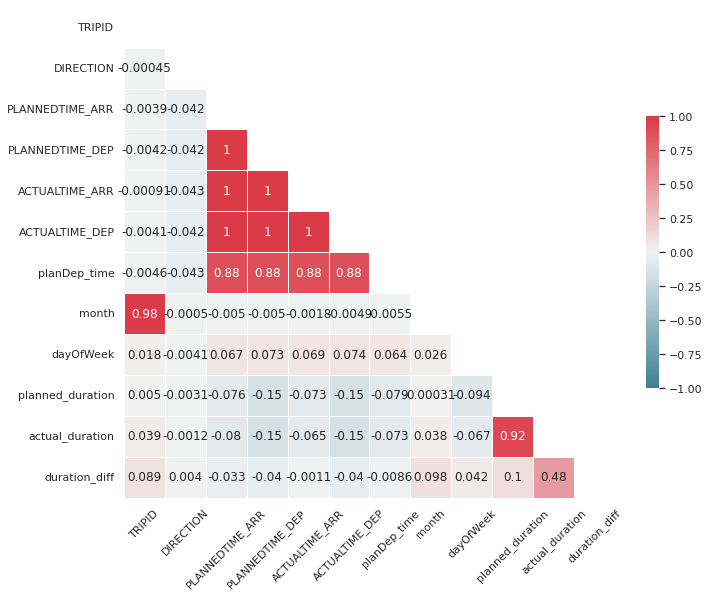

In [9]:
# Correlation matrix: https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Mask for the upper triangle
mask = np.zeros_like(cont_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cont_corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

<h2>Add a Weekend Column: Saturday 5 & Sunday 6</h2>

In [10]:
# Add weekend column: Saturday 5 & Sunday 6
trips['weekend'] = 0
trips['weekend'] = np.where(trips['dayOfWeek'] > 4, 1, trips['weekend'])

trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE,...,planDep_time,month,day,dayOfWeek,arrival_diff,departure_diff,planned_duration,actual_duration,duration_diff,weekend
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524,84600,28-FEB-18 12:05:11,...,0,2,7,2,279,0,2645,2924,279,0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752,26460,28-FEB-18 12:05:11,...,7,2,7,2,2235,0,4057,6292,2235,0
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329,32082,28-FEB-18 12:05:11,...,9,2,7,2,817,-18,3412,4247,835,0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463,54443,28-FEB-18 12:05:11,...,15,2,7,2,1202,23,2841,4020,1179,0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682,81608,28-FEB-18 12:05:11,...,23,2,7,2,-701,8,3783,3074,-709,0


In [11]:
weekend_check = trips [trips['weekend'] > 0]
weekend_check.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE,...,planDep_time,month,day,dayOfWeek,arrival_diff,departure_diff,planned_duration,actual_duration,duration_diff,weekend
37,2018-02-18,6268949,185,185_55,1,58751,57000,58834,56961,26-FEB-18 11:09:33,...,16,2,18,6,83,-39,1751,1873,122,1
38,2018-02-18,6268951,185,185_55,1,63551,61800,64229,62013,26-FEB-18 11:09:33,...,17,2,18,6,678,213,1751,2216,465,1
39,2018-02-18,6268953,185,185_55,1,68351,66600,68536,66599,26-FEB-18 11:09:33,...,18,2,18,6,185,-1,1751,1937,186,1
40,2018-02-18,6268387,16,16_20,1,37539,33600,37884,33710,26-FEB-18 11:09:33,...,9,2,18,6,345,110,3939,4174,235,1
41,2018-02-18,6277453,16,16_20,1,35139,31200,35178,31224,26-FEB-18 11:09:33,...,9,2,18,6,39,24,3939,3954,15,1


<h2>Add a Rush Hour Column: 8-9am & 4-6pm (Excludes weekends)</h2>

In [12]:
# Add Rush Hour Column: 8-9am & 4-6pm (Excludes weekends)
trips['rushHour'] = 0

trips['rushHour'] = np.where(trips['planDep_time'] == 8, 1, trips['rushHour'])

trips['rushHour'] = np.where(trips['planDep_time'] == 16, 1, trips['rushHour'])
trips['rushHour'] = np.where(trips['planDep_time'] == 17, 1, trips['rushHour'])

trips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE,...,month,day,dayOfWeek,arrival_diff,departure_diff,planned_duration,actual_duration,duration_diff,weekend,rushHour
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524,84600,28-FEB-18 12:05:11,...,2,7,2,279,0,2645,2924,279,0,0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752,26460,28-FEB-18 12:05:11,...,2,7,2,2235,0,4057,6292,2235,0,0
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329,32082,28-FEB-18 12:05:11,...,2,7,2,817,-18,3412,4247,835,0,0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463,54443,28-FEB-18 12:05:11,...,2,7,2,1202,23,2841,4020,1179,0,0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682,81608,28-FEB-18 12:05:11,...,2,7,2,-701,8,3783,3074,-709,0,0


In [13]:
trips['rushHour'] = np.where(trips['dayOfWeek'] > 4, 0, trips['rushHour'])

In [14]:
rush_check = trips [trips['rushHour'] > 0]
rush_check.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,LASTUPDATE,...,month,day,dayOfWeek,arrival_diff,departure_diff,planned_duration,actual_duration,duration_diff,weekend,rushHour
6,2018-02-07,6251760,39,39_21,2,34768,28920,35709,28929,28-FEB-18 12:05:11,...,2,7,2,941,9,5848,6780,932,0,1
8,2018-02-07,6251147,40D,40D_102,1,33558,30600,34540,31185,28-FEB-18 12:05:11,...,2,7,2,982,585,2958,3355,397,0,1
11,2018-02-07,6254310,83,83_22,2,63726,58500,64791,58562,28-FEB-18 12:05:11,...,2,7,2,1065,62,5226,6229,1003,0,1
15,2018-02-07,6253924,46A,46A_74,1,65768,60960,66075,60926,28-FEB-18 12:05:11,...,2,7,2,307,-34,4808,5149,341,0,1
22,2018-02-07,6246745,15,15_16,1,35708,30120,36589,30116,28-FEB-18 12:05:11,...,2,7,2,881,-4,5588,6473,885,0,1


In [16]:
continuous_columns1 = trips[['duration_diff', 'TRIPID', 'DIRECTION', 'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR', 
                            'ACTUALTIME_DEP', 'planDep_time', 'month', 'dayOfWeek', 'planned_duration', 'actual_duration', 
                           'weekend', 'rushHour']]

cont_corr1 = continuous_columns1.corr()
cont_corr1

,duration_diff,TRIPID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,planDep_time,month,dayOfWeek,planned_duration,actual_duration,weekend,rushHour
duration_diff,1.000000,0.088809,0.003973,-0.032677,-0.039821,-0.001095,-0.040240,-0.008589,0.097834,0.041878,0.102593,0.478716,-0.033057,0.101889
TRIPID,0.088809,1.000000,-0.000450,-0.003891,-0.004220,-0.000911,-0.004083,-0.004617,0.982430,0.018345,0.004996,0.038882,0.017407,-0.006028
DIRECTION,0.003973,-0.000450,1.000000,-0.042423,-0.041857,-0.042640,-0.042175,-0.043225,-0.000498,-0.004075,-0.003089,-0.001184,-0.005190,0.007679
PLANNEDTIME_ARR,-0.032677,-0.003891,-0.042423,1.000000,0.997405,0.999447,0.997348,0.880693,-0.005043,0.067018,-0.076135,-0.079883,0.091047,-0.099253
PLANNEDTIME_DEP,-0.039821,-0.004220,-0.041857,0.997405,1.000000,0.996627,0.999947,0.879252,-0.005025,0.073285,-0.147729,-0.145846,0.099513,-0.111812
ACTUALTIME_ARR,-0.001095,-0.000911,-0.042640,0.999447,0.996627,1.000000,0.996664,0.880926,-0.001777,0.068763,-0.072958,-0.064820,0.090246,-0.096016
ACTUALTIME_DEP,-0.040240,-0.004083,-0.042175,0.997348,0.999947,0.996664,1.000000,0.879274,-0.004890,0.073648,-0.147775,-0.146050,0.099716,-0.111780
planDep_time,-0.008589,-0.004617,-0.043225,0.880693,0.879252,0.880926,0.879274,1.000000,-0.005501,0.063509,-0.078748,-0.072840,0.087962,-0.084653
month,0.097834,0.982430,-0.000498,-0.005043,-0.005025,-0.001777,-0.004890,-0.005501,1.000000,0.025966,0.000314,0.038253,0.019094,-0.006737
dayOfWeek,0.041878,0.018345,-0.004075,0.067018,0.073285,0.068763,0.073648,0.063509,0.025966,1.000000,-0.094306,-0.066981,0.736610,-0.177852


/tmp/ipykernel_22592/1775779604.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(cont_corr1, dtype=np.bool)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'duration_diff'),
  Text(1.5, 0, 'TRIPID'),
  Text(2.5, 0, 'DIRECTION'),
  Text(3.5, 0, 'PLANNEDTIME_ARR'),
  Text(4.5, 0, 'PLANNEDTIME_DEP'),
  Text(5.5, 0, 'ACTUALTIME_ARR'),
  Text(6.5, 0, 'ACTUALTIME_DEP'),
  Text(7.5, 0, 'planDep_time'),
  Text(8.5, 0, 'month'),
  Text(9.5, 0, 'dayOfWeek'),
  Text(10.5, 0, 'planned_duration'),
  Text(11.5, 0, 'actual_duration'),
  Text(12.5, 0, 'weekend'),
  Text(13.5, 0, 'rushHour')])

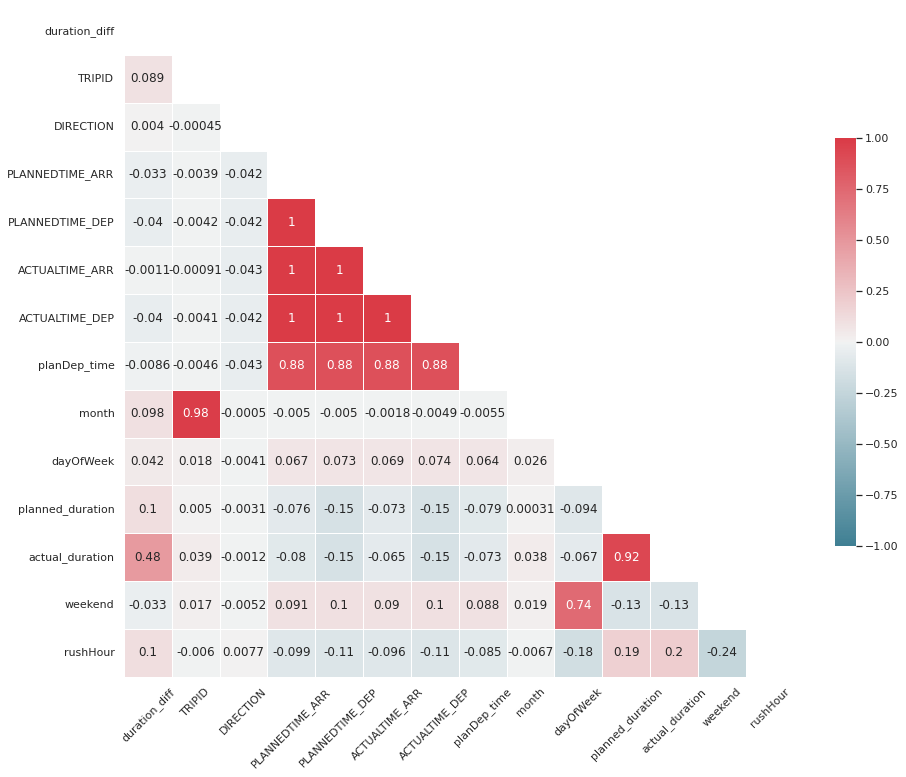

In [17]:
# Correlation matrix: https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Mask for the upper triangle
mask = np.zeros_like(cont_corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cont_corr1, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

In [18]:
# Send cleaned df to csv:
trips.to_csv('cleaned_trips.csv', index=False)

## Continuous Features

<h3>Planned Arrival Time vs. Duration Difference</h3>

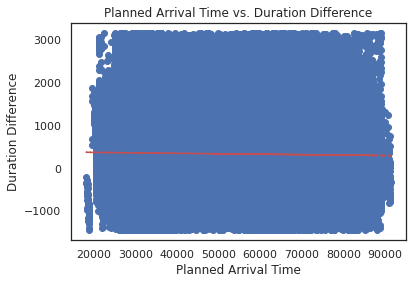

In [19]:
x = trips['PLANNEDTIME_ARR']
y = trips['duration_diff']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('Planned Arrival Time vs. Duration Difference')
plt.xlabel('Planned Arrival Time')
plt.ylabel('Duration Difference')
plt.show()

<h3>Planned Departure Time vs. Duration Difference:</h3>

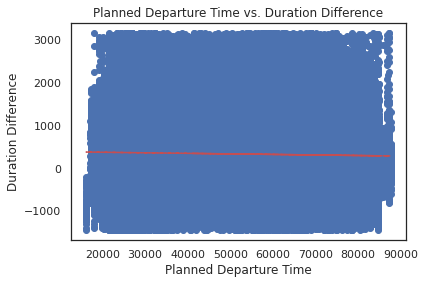

In [20]:
x = trips['PLANNEDTIME_DEP']
y = trips['duration_diff']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('Planned Departure Time vs. Duration Difference')
plt.xlabel('Planned Departure Time')
plt.ylabel('Duration Difference')
plt.show()

<h3>Actual Arrival Time vs. Duration Difference:</h3>

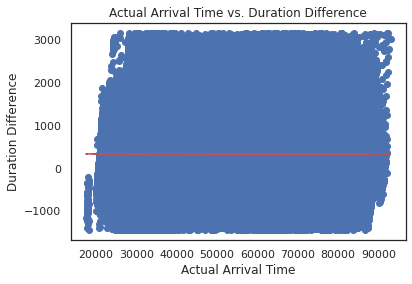

In [21]:
x = trips['ACTUALTIME_ARR']
y = trips['duration_diff']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('Actual Arrival Time vs. Duration Difference')
plt.xlabel('Actual Arrival Time')
plt.ylabel('Duration Difference')
plt.show()

<h3>Actual Departure Time vs. Duration Difference:</h3>

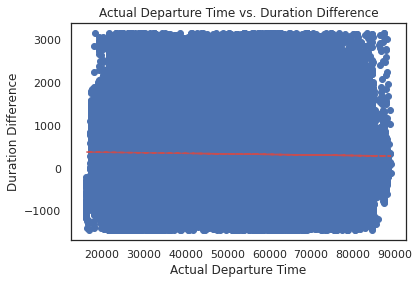

In [22]:
x = trips['ACTUALTIME_DEP']
y = trips['duration_diff']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('Actual Departure Time vs. Duration Difference')
plt.xlabel('Actual Departure Time')
plt.ylabel('Duration Difference')
plt.show()

<h3>Month vs. Duration Difference:</h3>

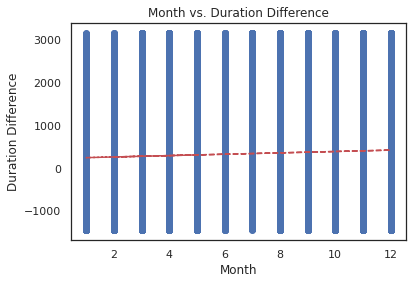

In [23]:
x = trips['month']
y = trips['duration_diff']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('Month vs. Duration Difference')
plt.xlabel('Month')
plt.ylabel('Duration Difference')
plt.show()

<h3>Day of the Week vs. Duration Difference:</h3>

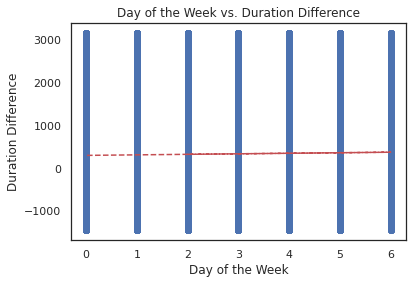

In [24]:
x = trips['dayOfWeek']
y = trips['duration_diff']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title('Day of the Week vs. Duration Difference')
plt.xlabel('Day of the Week')
plt.ylabel('Duration Difference')
plt.show()